# **Long vs. Wide Data Formats in Data Analysis**

## **Long Vs Wide Data**

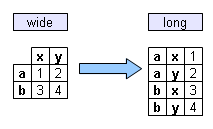

"Long" and "wide" are terms often used in data analysis and data reshaping in the context of data frames or tables, typically in software like R or Python. They describe two different ways of organizing and structuring data. 

#### **1. Long Format (also called "Tidy" or "Melted")**:
   - In the long format, each row typically represents an individual observation or data point, and each column represents a variable or attribute. 
   - This format is useful when you have a dataset where you want to store multiple measurements or values for the same individuals or entities.
   - Long data is often more convenient for various types of statistical analysis, and it can be easier to filter, subset, and manipulate the data.

#### **2. Wide Format (also called "Spread" or "Pivoted"):**
   - In the wide format, each row represents an individual, and multiple variables are stored in separate columns.
   - This format is useful when you have a dataset with a few variables and you want to see the values for each individual at a glance, which can be more readable for humans.
   - Wide data can be useful for simple summaries and initial data exploration.

Here's a simple example to illustrate the difference:

**Long Format:**

| ID | Variable   | Value |
|----|------------|-------|
| 1  | Age        | 25    |
| 1  | Height     | 175   |
| 1  | Weight     | 70    |
| 2  | Age        | 30    |
| 2  | Height     | 160   |
| 2  | Weight     | 60    |

**Wide Format:**

| ID | Age | Height | Weight |
|----|-----|--------|--------|
| 1  | 25  | 175    | 70     |
| 2  | 30  | 160    | 60     |

Converting data between long and wide formats is often necessary depending on the specific analysis or visualization tasks you want to perform. In software like R and Python, there are functions and libraries available for reshaping data between these formats, such as `tidyr` in R and `pivot` functions in Python's pandas library for moving from wide to long format, and `gather` in R and `melt` in pandas for moving from long to wide format.

# **Data Conversion : melt**
* wide is converted into long

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.DataFrame({'cse':[120]})

,cse
0,120


In [4]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [5]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]})

,cse,ece,mech
0,120,100,50


In [7]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [9]:
# var_name and value_name
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [10]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [11]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,130
8,2021,80
9,2022,150


In [12]:
# id_vars ->  we don't want to convert
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


### Real-World Example:

* In the context of COVID-19 data, data for deaths and confirmed cases are initially stored in wide formats.
* The data is converted to long format, making it easier to conduct analyses.
* In the long format, each row represents a specific location, date, and the corresponding number of deaths or confirmed cases.
This format allows for efficient merging and analysis, as it keeps related data in one place and facilitates further data exploration.

In [13]:
# melt -> real world example
death = pd.read_csv('Data\Day42\death_covid.csv')
confirm = pd.read_csv('Data\Day42\Confirmed_covid.csv')

In [14]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [15]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [16]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [17]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [18]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [19]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])

,Province/State,Country/Region,Lat,Long,date,num_cases,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [20]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


The choice between long and wide data formats depends on the nature of the dataset and the specific analysis or visualization tasks you want to perform. Converting data between these formats can help optimize data organization for different analytical needs.